## Import Libraries

In [1]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
#Load train data 
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#load test data 
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#load gender submission
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
print(submission.shape)

(418, 2)


In [5]:
submission =pd.DataFrame(submission)
submission.drop("PassengerId",axis=1,inplace=True)
print(submission)

     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]


In [6]:
#discribe train data 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_data.shape 

(891, 12)

## Correlation between data

<Axes: >

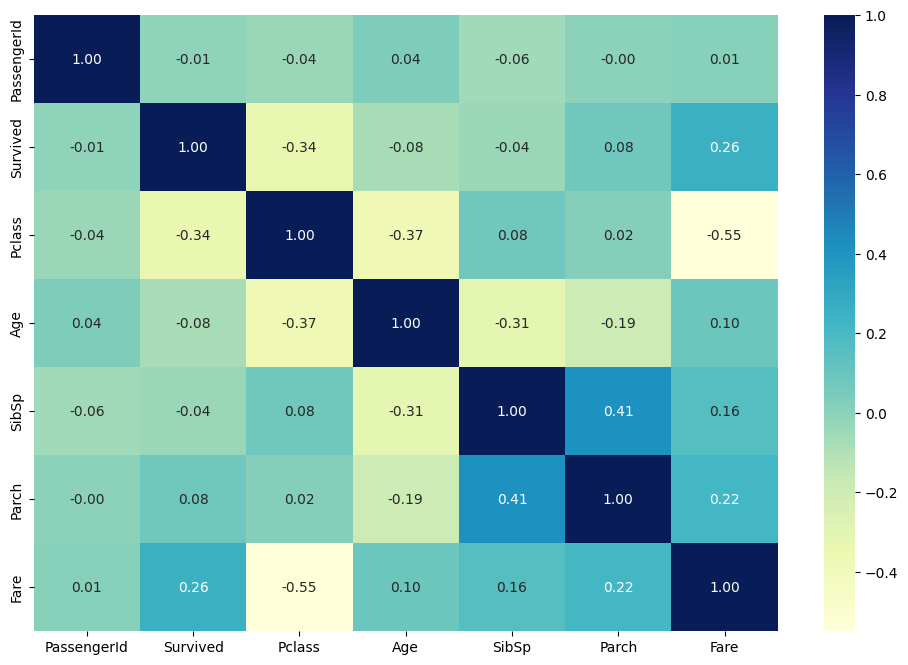

In [11]:
#plot correlation between data 
fig ,ax = plt.subplots(figsize=(12,8))
cor = train_data.select_dtypes(include = [np.number])
sns.heatmap(cor.corr(),annot = True,cmap = "YlGnBu",fmt=".2f")

## preprocessing of data

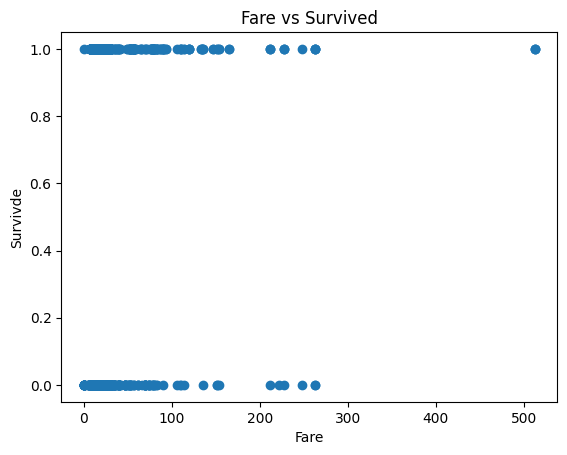

In [12]:
#drow relation between fare and survived 
plt.scatter(x = train_data["Fare"], y =train_data["Survived"])
plt.xlabel("Fare")
plt.ylabel("Survivde")
plt.title("Fare vs Survived")
plt.show()

In [13]:
#Delete anomaly value 
train_data = train_data.drop(train_data[(train_data["Fare"]>400)].index)

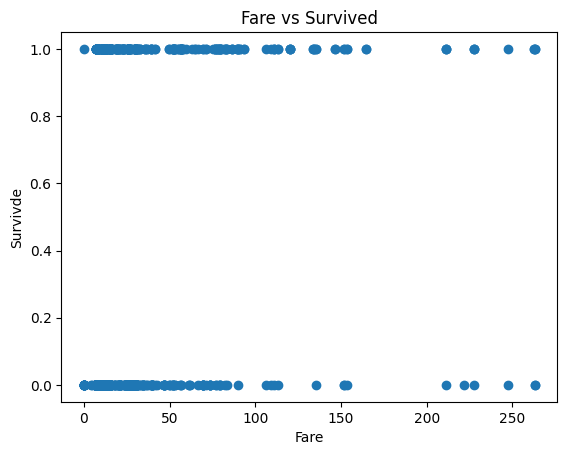

In [14]:
#drow relation between fare and survived 
plt.scatter(x = train_data["Fare"], y =train_data["Survived"])
plt.xlabel("Fare")
plt.ylabel("Survivde")
plt.title("Fare vs Survived")
plt.show()

count    711.000000
mean      29.675345
std       14.552495
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


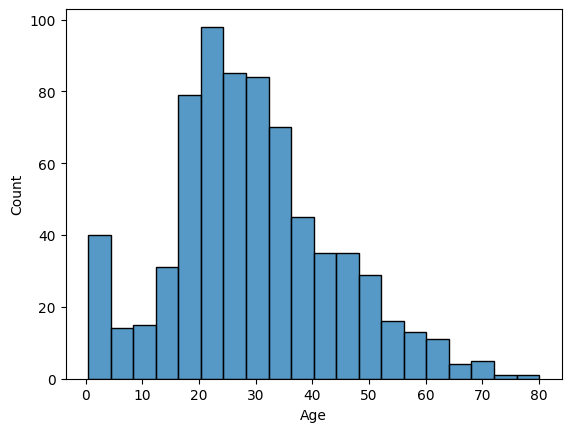

In [15]:
print(train_data["Age"].describe())
sns.histplot(train_data["Age"])
plt.show()

In [16]:
#impute train data "Age"
impute = SimpleImputer(missing_values = np.nan, strategy= "mean",)
train_data["Age"] = impute.fit_transform(train_data[["Age"]])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.675345,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


count    888.000000
mean      29.675345
std       13.019816
min        0.420000
25%       22.000000
50%       29.675345
75%       35.000000
max       80.000000
Name: Age, dtype: float64


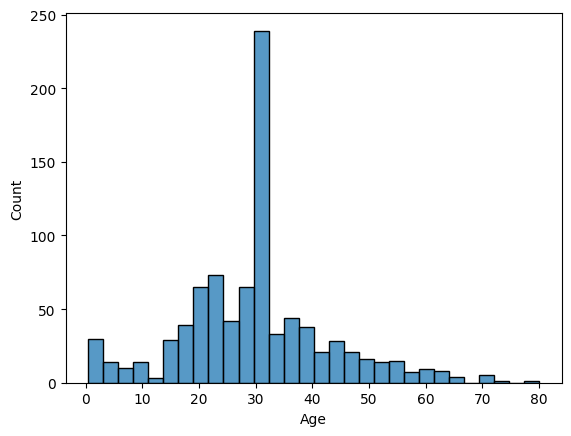

In [17]:
print(train_data["Age"].describe())
sns.histplot(train_data["Age"])
plt.show()

In [18]:
#impute test_data "Age"
impute = SimpleImputer(missing_values = np.nan, strategy= "mean")
test_data["Age"] = impute.fit_transform(test_data[["Age"]])
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [19]:
train_data.drop(columns=["Cabin","Name","PassengerId","Ticket"],inplace=True,axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.675345,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [20]:
test_data.drop(columns=["Cabin","Name","PassengerId","Ticket"],inplace=True,axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [21]:
train_data.dropna(inplace=True,axis=0)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.675345,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [22]:
#impute test_data "Age"
impute = SimpleImputer(missing_values = np.nan, strategy= "mean")
test_data["Fare"] = impute.fit_transform(test_data[["Fare"]])
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [23]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Number of survived males: 107
Number of non-survived males: 468
Number of survived females: 230
Number of non-survived females: 81


Text(0.5, 1.0, 'Sex : Male and Female')

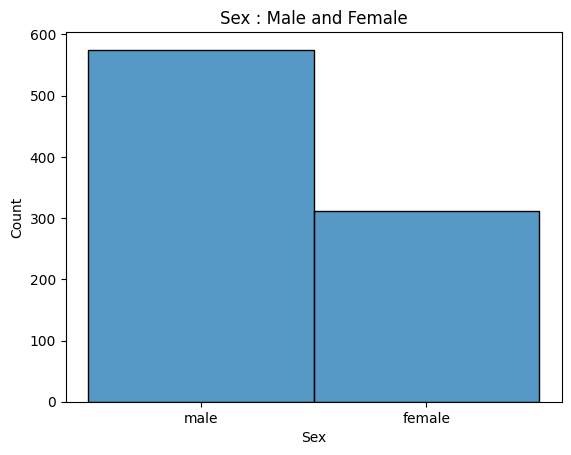

In [25]:
#drow number of male and female were survive or not 
train_data = train_data.reset_index(drop=True)
survived_male = 0
non_survived_male = 0
survived_female = 0
non_survived_female =0
for i in range(len(train_data["Sex"])):
    if train_data.loc[i,"Sex"]== "male" and train_data.loc[i,"Survived"]==1:
        survived_male += 1 
    elif train_data.loc[i,"Sex"]== "male" and train_data.loc[i,"Survived"]==0:
        non_survived_male += 1 
    elif train_data.loc[i,"Sex"]=="female" and train_data.loc[i,"Survived"]==1:
        survived_female +=  1
    else :
        non_survived_female += 1
print(f"Number of survived males: {survived_male}")
print(f"Number of non-survived males: {non_survived_male}")
print(f"Number of survived females: {survived_female}")
print(f"Number of non-survived females: {non_survived_female}")
sns.histplot(train_data["Sex"])
plt.title("Sex : Male and Female")

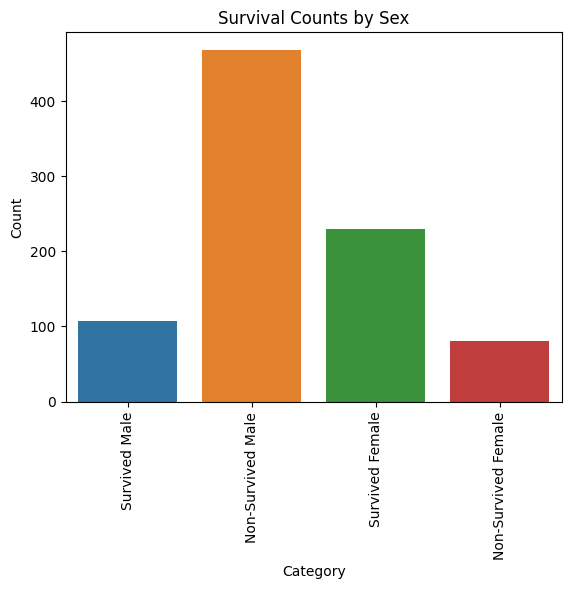

In [26]:
#count number of survived male and female
data = {
    "Category": ["Survived Male", "Non-Survived Male", "Survived Female", "Non-Survived Female"],
    "Count": [survived_male, non_survived_male, survived_female, non_survived_female]
}

# Convert to DataFrame
count_data = pd.DataFrame(data)

# Plot the counts
sns.barplot(data=count_data,x="Category", y="Count")
plt.title("Survival Counts by Sex")
plt.xticks(rotation=90)
plt.show()

In [27]:
numeric_train = train_data.select_dtypes(include=[np.number]).columns.tolist()
object_train = train_data.select_dtypes(exclude=[np.number]).columns.tolist()
train_data[object_train]

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
881,male,S
882,female,S
883,female,S
884,male,C


In [28]:
numeric_test = test_data.select_dtypes(include=[np.number]).columns.tolist()
object_test = test_data.select_dtypes(exclude = [np.number]).columns.tolist()

In [29]:
dummy_train = pd.get_dummies(train_data[object_train],drop_first=True)
dummy_train

,Sex_male,Embarked_Q,Embarked_S
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True
...,...,...,...
881,True,False,True
882,False,False,True
883,False,False,True
884,True,False,False


In [30]:
dummy_test = pd.get_dummies(test_data[object_test],drop_first=True)
dummy_test

,Sex_male,Embarked_Q,Embarked_S
0,True,True,False
1,False,False,True
2,True,True,False
3,True,False,True
4,False,False,True
...,...,...,...
413,True,False,True
414,False,False,False
415,True,False,True
416,True,False,True


In [31]:
train_data.drop(columns= object_train,inplace=True)
train_data = pd.concat([train_data,dummy_train],axis=1)
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,True,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
881,0,2,27.000000,0,0,13.0000,True,False,True
882,1,1,19.000000,0,0,30.0000,False,False,True
883,0,3,29.675345,1,2,23.4500,False,False,True
884,1,1,26.000000,0,0,30.0000,True,False,False


In [32]:
test_data.drop(columns=object_test,inplace=True)
test_data = pd.concat([test_data,dummy_test],axis=1)
test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,True,True,False
1,3,47.00000,1,0,7.0000,False,False,True
2,2,62.00000,0,0,9.6875,True,True,False
3,3,27.00000,0,0,8.6625,True,False,True
4,3,22.00000,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,True,False,True
414,1,39.00000,0,0,108.9000,False,False,False
415,3,38.50000,0,0,7.2500,True,False,True
416,3,30.27259,0,0,8.0500,True,False,True


In [33]:
#Splitting data 
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
X_test = test_data
y_test = submission.values.ravel()
print("shape of X_train is :",X_train.shape)
print("shape of y_train is :",y_train.shape)
print("shape of X_test is :",X_test.shape)
print("shape of y_test is :",y_test.shape)

shape of X_train is : (886, 8)
shape of y_train is : (886,)
shape of X_test is : (418, 8)
shape of y_test is : (418,)


## Apply Models

## 1- Logistic Regression Model

In [34]:
#Apply Model 
LogisticRegressionModel = LogisticRegression(max_iter=200,n_jobs=-1,random_state=44)
LogisticRegressionModel.fit(X_train,y_train)
print("score of train is :",LogisticRegressionModel.score(X_train,y_train))
print("Score of test is :",LogisticRegressionModel.score(X_test,y_test))

score of train is : 0.8036117381489842
Score of test is : 0.9425837320574163


In [35]:
#predicted value
y_pred_LR = LogisticRegressionModel.predict(X_test)
y_pred_prob =LogisticRegressionModel.predict_proba(X_test)
print("the predicted value is :",y_pred_LR[:10])
print("the actual value is :   ",y_test[:10])
print("the probability of X_test is :\n",y_pred_prob[:5])

the predicted value is : [0 0 0 0 1 0 1 0 1 0]
the actual value is :    [0 1 0 0 1 0 1 0 1 0]
the probability of X_test is :
 [[0.88779871 0.11220129]
 [0.65530145 0.34469855]
 [0.88340415 0.11659585]
 [0.89827857 0.10172143]
 [0.43160726 0.56839274]]


In [36]:
print("the accurecy score for Logistic Regression is :",accuracy_score(y_test,y_pred_LR))
print("f1_score for Logistic Regression is :",f1_score(y_test,y_pred_LR))
print("number of iteration is :",LogisticRegressionModel.n_iter_)

the accurecy score for Logistic Regression is : 0.9425837320574163
f1_score for Logistic Regression is : 0.9215686274509804
number of iteration is : [165]


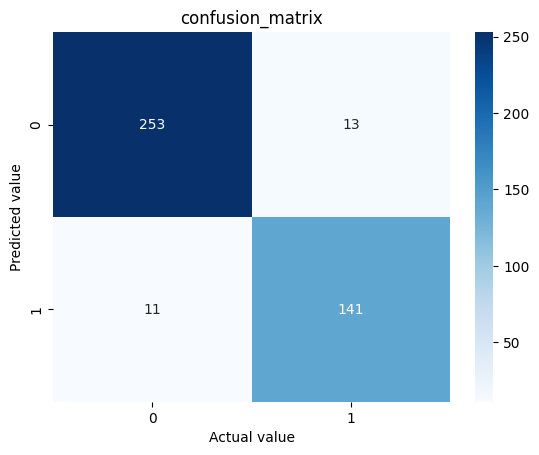

In [37]:
CM = confusion_matrix(y_test,y_pred_LR)
sns.heatmap(CM,fmt="d",cmap="Blues",annot=True)
plt.title("confusion_matrix")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

## 2-Random Forest Model

In [49]:
#ِApply Ensamble Random Forest 
RandomForestModel = RandomForestClassifier(n_estimators=100,max_depth=2)
RandomForestModel.fit(X_train,y_train)
print("RandomForest score for train is : ",RandomForestModel.score(X_train,y_train))
print("RandomForest score for test is : ",RandomForestModel.score(X_test,y_test))

RandomForest score for train is :  0.8036117381489842
RandomForest score for test is :  0.84688995215311


In [50]:
y_pred_RF = RandomForestModel.predict(X_test)
print("Accuracy score of Random Forest is :",accuracy_score(y_test,y_pred_RF))
CM = confusion_matrix(y_test,y_pred_RF)
print("confusion_matrix is: \n",CM)

Accuracy score of Random Forest is : 0.84688995215311
confusion_matrix is: 
 [[264   2]
 [ 62  90]]


## 3-Neural Network Model

In [40]:
#Apply Neural Network Model 
MLPClassifierModel = MLPClassifier(activation="tanh",hidden_layer_sizes=(100,3),early_stopping=False,alpha=0.001,solver="adam")
MLPClassifierModel.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(100, 3))

In [41]:
#Calculating Details
print('MLPClassifierModel Train Score is : ', MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print("MLPClassifier losses is :",MLPClassifierModel.loss_)
print("MLPClassifierModel number of iteration is : ",MLPClassifierModel.n_iter_)
print("MLPClassifierModel number if layers are:",MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)

MLPClassifierModel Train Score is :  0.845372460496614
MLPClassifierModel Test Score is :  0.9066985645933014
MLPClassifier losses is : 0.38319994632347665
MLPClassifierModel number of iteration is :  200
MLPClassifierModel number if layers are: 4
MLPClassifierModel last activation is :  logistic


In [42]:
#calculate predicted valuse 
y_pred_NN = MLPClassifierModel.predict(X_test)
print("MLPClassifierModel accuracy score is : ",accuracy_score(y_test,y_pred_NN))
print('Predicted Value for MLPClassifierModel is : ' , y_pred_NN[:10])
print("Actual value for MLPClassifierModel is    : " ,y_test[:10] )
print('Prediction Probabilities Value for MLPClassifierModel is : \n' , y_pred_prob[:10])

MLPClassifierModel accuracy score is :  0.9066985645933014
Predicted Value for MLPClassifierModel is :  [0 0 0 0 1 0 1 0 1 0]
Actual value for MLPClassifierModel is    :  [0 1 0 0 1 0 1 0 1 0]
Prediction Probabilities Value for MLPClassifierModel is : 
 [[0.88779871 0.11220129]
 [0.65530145 0.34469855]
 [0.88340415 0.11659585]
 [0.89827857 0.10172143]
 [0.43160726 0.56839274]
 [0.84138355 0.15861645]
 [0.3263388  0.6736612 ]
 [0.79883612 0.20116388]
 [0.23187323 0.76812677]
 [0.92685979 0.07314021]]


## 4- K-Nearest Neighbors Model

In [43]:
#Apply KNeighborClassifier
KNNModel= KNeighborsClassifier(n_neighbors=2,weights="distance",algorithm="auto")
KNNModel.fit(X_train,y_train)
print('SVCModel Train Score is : ' , KNNModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , KNNModel.score(X_test, y_test))

SVCModel Train Score is :  0.981941309255079
SVCModel Test Score is :  0.6124401913875598


In [44]:
#calculate predicted valuse 
y_pred_KNN = KNNModel.predict(X_test)
print("KNNModel accuracy score is : ",accuracy_score(y_test,y_pred_KNN))
print('Predicted Value for KNNModel is : ' , y_pred_KNN[:10])
print("Actual value for KNNModel is    : " ,y_test[:10] )
print('Prediction Probabilities Value for KNNModel is : \n' , y_pred_prob[:10])

KNNModel accuracy score is :  0.6124401913875598
Predicted Value for KNNModel is :  [0 0 1 1 0 0 0 1 1 0]
Actual value for KNNModel is    :  [0 1 0 0 1 0 1 0 1 0]
Prediction Probabilities Value for KNNModel is : 
 [[0.88779871 0.11220129]
 [0.65530145 0.34469855]
 [0.88340415 0.11659585]
 [0.89827857 0.10172143]
 [0.43160726 0.56839274]
 [0.84138355 0.15861645]
 [0.3263388  0.6736612 ]
 [0.79883612 0.20116388]
 [0.23187323 0.76812677]
 [0.92685979 0.07314021]]


## Model evaluation 
we can evaluation af all models to choose the best one for our problem. KNN has overfit in the training set,so we choose the logistic regression.It is the best one. 